**load packages**

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**1.create the multi-panel plot for theta**

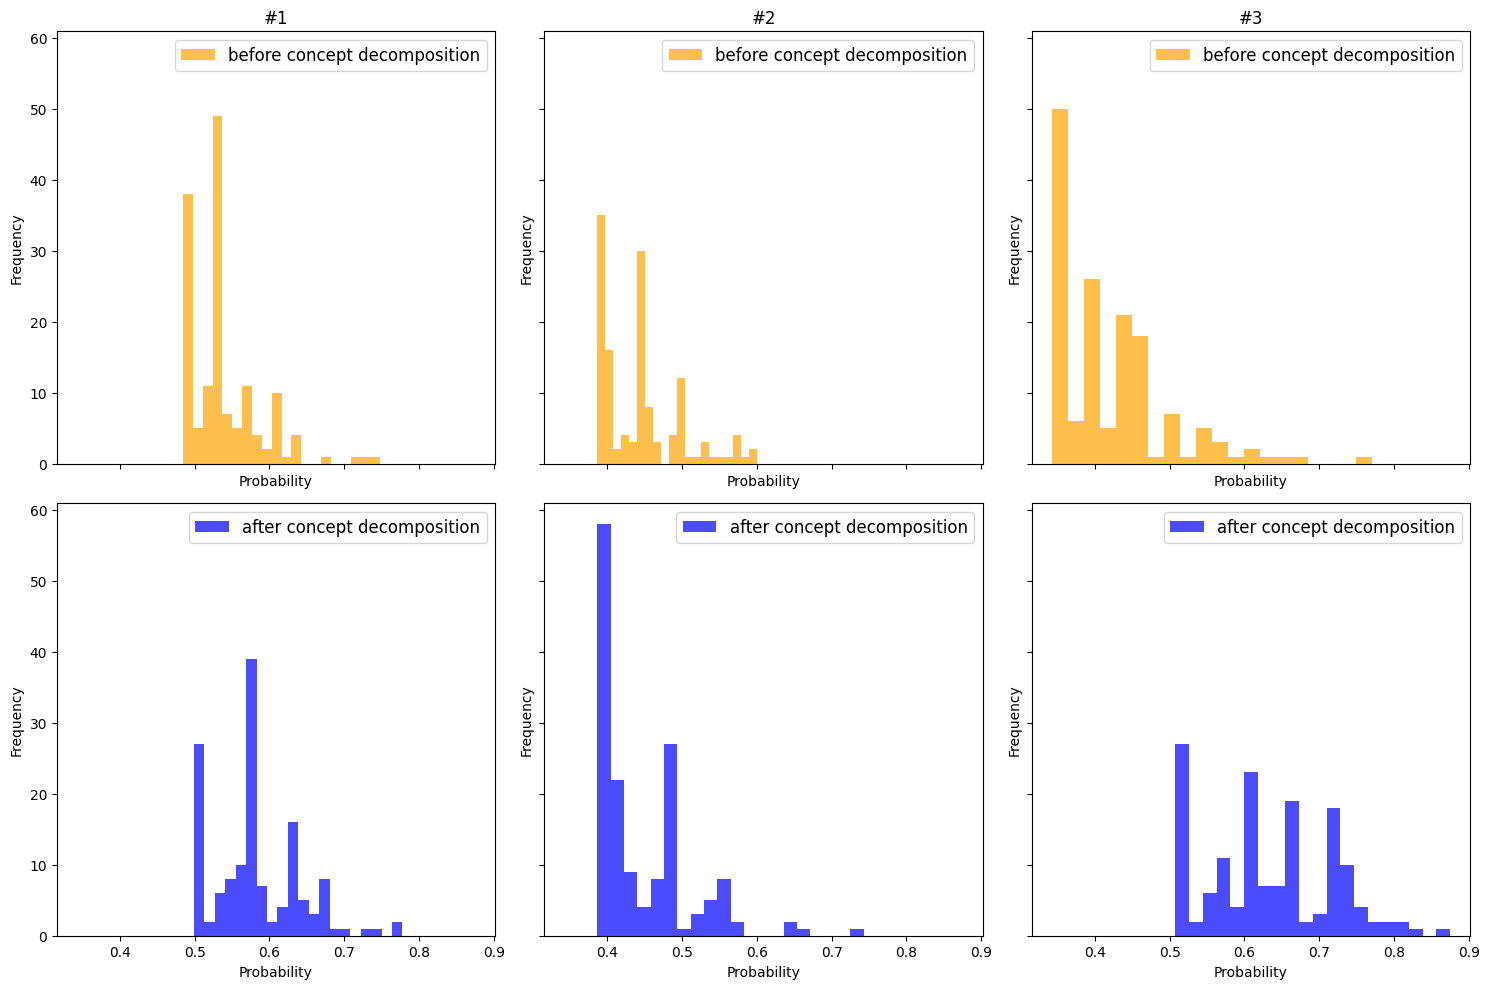

In [7]:
# Load the data from CSV files （change your path here）
theta_after = pd.read_csv('./theta_after.csv')
theta_before = pd.read_csv('./theta_before.csv')

# Drop any extraneous columns if present
theta_after.drop(columns=[col for col in theta_after.columns if 'Unnamed' in col], inplace=True)
theta_before.drop(columns=[col for col in theta_before.columns if 'Unnamed' in col], inplace=True)

# Calculate the thresholds for the highest 20% values for each topic
filtered_after_individual = {
    topic: theta_after[theta_after[topic] > theta_after[topic].quantile(0.8)] for topic in ['Topic1', 'Topic2', 'Topic3']
}
filtered_before_individual = {
    topic: theta_before[theta_before[topic] > theta_before[topic].quantile(0.8)] for topic in ['Topic1', 'Topic2', 'Topic3']
}

# Prepare the histograms for the individually filtered data
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

# Iterate through each topic to plot for individually filtered data
for i, topic in enumerate(['Topic1', 'Topic2', 'Topic3'], start=1):
    # Histogram for "before concept decomposition" with filtered data
    axes[0, i-1].hist(filtered_before_individual[topic][topic], bins=20, alpha=0.7, label='before concept decomposition', color='orange')
    # Histogram for "after concept decomposition" with filtered data
    axes[1, i-1].hist(filtered_after_individual[topic][topic], bins=20, alpha=0.7, label='after concept decomposition', color='blue')
    
    # Set titles for the top row
    axes[0, i-1].set_title(f"#{i}")
    
    # Set legend with increased font size
    axes[0, i-1].legend(fontsize='large')
    axes[1, i-1].legend(fontsize='large')

# Label axes
for ax in axes.flat:
    ax.set(xlabel='Probability', ylabel='Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

**2.create the multi-panel plot for T-SNE**

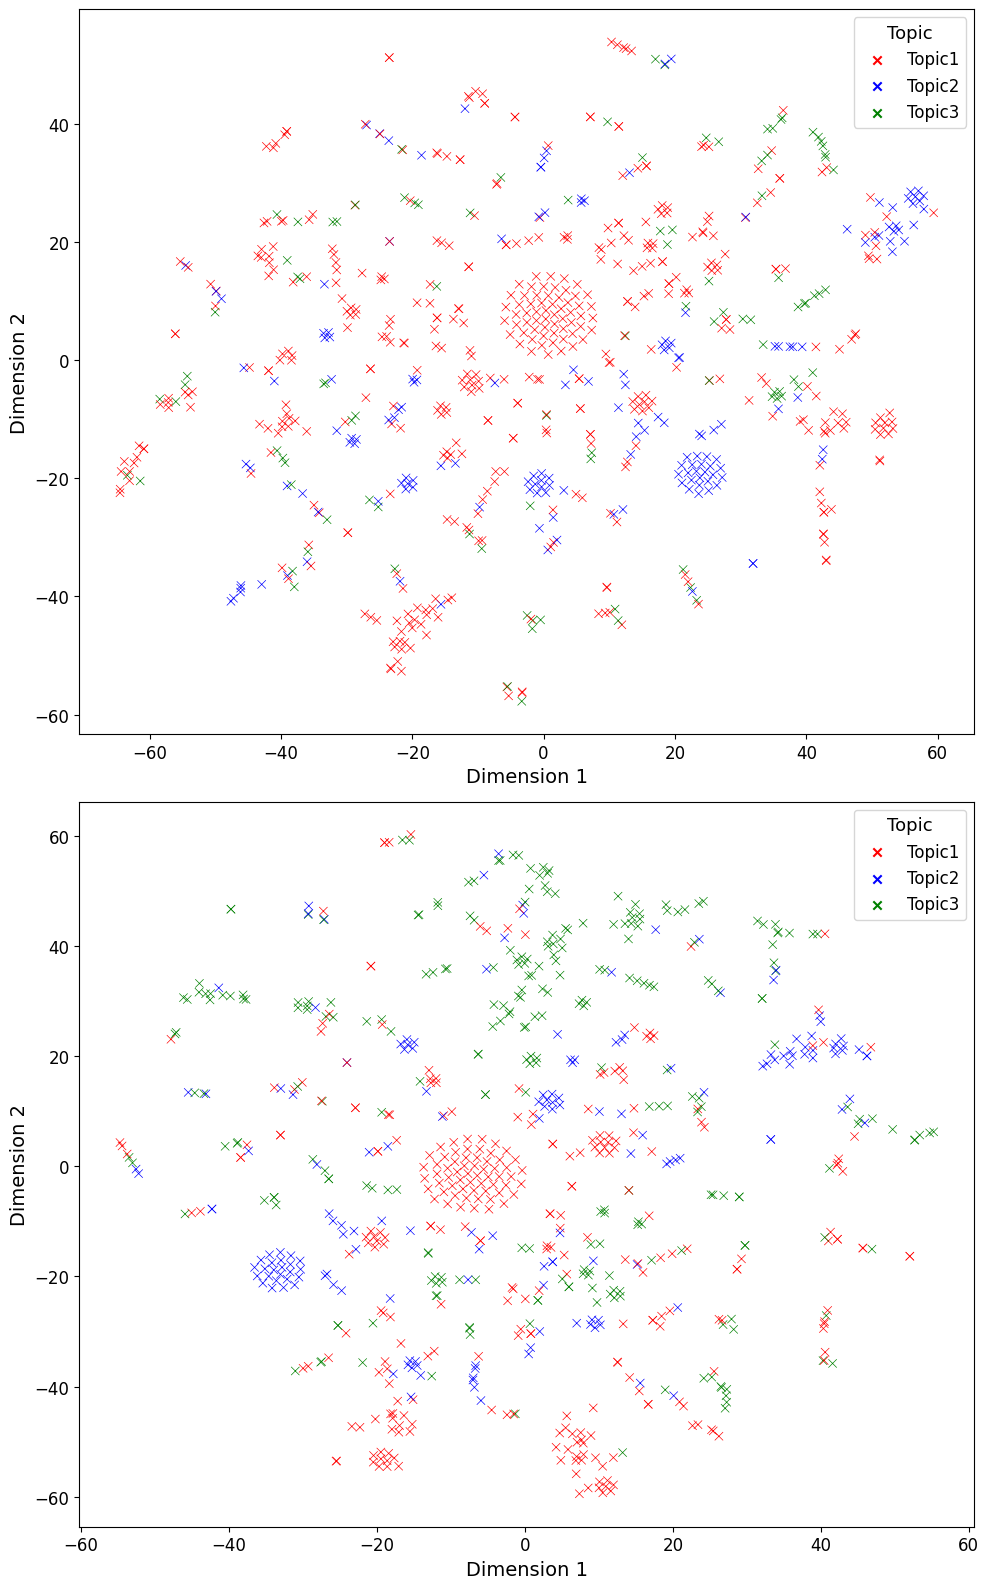

In [8]:
def plot_tsne(data, title, ax, legend_order=None):
    # Using consistent colors and larger font sizes
    if legend_order:
        hue_order = legend_order
    else:
        hue_order = ['Topic1', 'Topic2', 'Topic3']

    sns.scatterplot(x='X1', y='X2', hue='Topic', style='Topic', markers=['x', 'x', 'x'], data=data,
                    palette={'Topic1': 'red', 'Topic2': 'blue', 'Topic3': 'green'}, hue_order=hue_order, ax=ax)
    ax.set_xlabel('Dimension 1', fontsize=14)
    ax.set_ylabel('Dimension 2', fontsize=14)
    ax.legend(title='Topic', fontsize=12, loc='upper right', title_fontsize='13')  # Increase legend and label font size
    ax.tick_params(labelsize=12)  # Increase tick font size

# Load the data from the provided CSV files （change your path here）
tsne_before = pd.read_csv('./tsne_before.csv')
tsne_after = pd.read_csv('./tsne_after.csv')

# Create the figure with increased font sizes
fig, axes = plt.subplots(2, 1, figsize=(10, 16))
plot_tsne(tsne_before, '', axes[0])
plot_tsne(tsne_after, '', axes[1], legend_order=['Topic1', 'Topic2', 'Topic3'])
plt.tight_layout()
plt.show()
